In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('drive/MyDrive/Colab Notebooks/weatherAUS.csv')


# Display the first few rows of the dataframe

print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

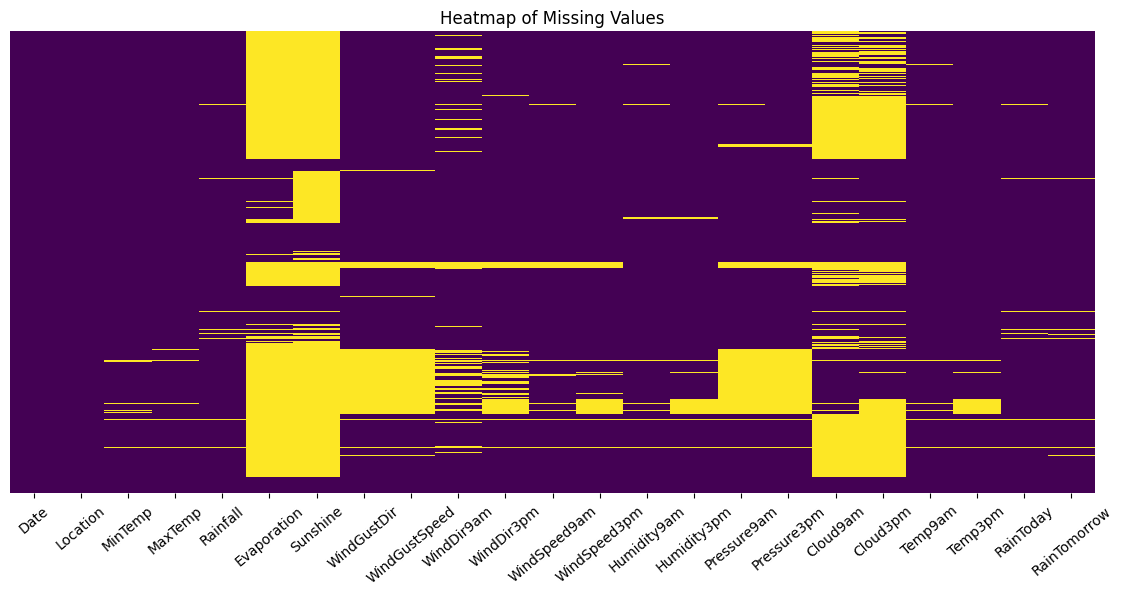

Date                 0
Location             0
MinTemp            447
MaxTemp            327
Rainfall           502
Evaporation      14380
Sunshine         17024
WindGustDir       3684
WindGustSpeed     3682
WindDir9am        2981
WindDir3pm        1873
WindSpeed9am       711
WindSpeed3pm      1390
Humidity9am        492
Humidity3pm       1186
Pressure9am       3590
Pressure3pm       3586
Cloud9am          9738
Cloud3pm         10050
Temp9am            349
Temp3pm           1037
RainToday          502
RainTomorrow       502
dtype: int64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
# plotting the heatmap
sns.heatmap(df.isnull() , cbar=False , cmap='viridis' , yticklabels=False)
# rotating the x axis labels
plt.xticks(rotation=40)
# definig the title
plt.title('Heatmap of Missing Values')
plt.show()
print(df.isnull().sum())


In [18]:

df = df.dropna(subset=['RainTomorrow'])

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
#df = df.dropna(subset=numeric_cols)
#df = df.dropna(subset=non_numeric_cols)
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
Number of rows: 21398
Number of columns: 23


<ipython-input-18-15647819d357>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
<ipython-input-18-15647819d357>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday_numeric'] = le.fit_transform(df['RainToday'])
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     6.128364  8.119565   
1  2008-12-02   Albury      7.4     25.1       0.0     6.128364  8.119565   
2  2008-12-03   Albury     12.9     25.7       0.0     6.128364  8.119565   
3  2008-12-04   Albury      9.2     28.0       0.0     6.128364  8.119565   
4  2008-12-05   Albury     17.5     32.3       1.0     6.128364  8.119565   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1   

<ipython-input-19-66645263bf41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday_numeric'] = le.fit_transform(df['RainToday'])


In [20]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',"RainToday_numeric"]

# Target variable
target = 'RainTomorrow'

# Create feature and target arrays
X = df[features]

y = df[target]
print(y.head())

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object


In [21]:
# Convert categorical target to numeric
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Display feature and target arrays
print(X.head())
print(y.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     6.128364  8.119565           44.0   
1      7.4     25.1       0.0     6.128364  8.119565           44.0   
2     12.9     25.7       0.0     6.128364  8.119565           46.0   
3      9.2     28.0       0.0     6.128364  8.119565           24.0   
4     17.5     32.3       1.0     6.128364  8.119565           41.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0         25.0       1010.6       1007.8     17.2     24.3   
2         38.0         30.0       1007.6       1008.7     21.0     23.2   
3         45.0         16.0       1017.6       1012.8     18.1     26.5   
4         82.0         33.0       1010.8       1006.0     17.8     29.7   

   RainToday_numeric  
0                  0  
1                  0  
2                  0  
3                  0  
4      

In [22]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.preprocessing import  MinMaxScaler  # Add MinMaxScaler here

# Scale numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert scaled arrays back to DataFrames for displaying results
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

(17118, 13) (4280, 13) (17118,) (4280,)


In [23]:
# Initialize the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#model = LogisticRegression(max_iter=400)
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(n_estimators=15, random_state=42)
#model = KNeighborsClassifier(n_neighbors=4)
# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [24]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8329439252336449
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3328
           1       0.68      0.47      0.55       952

    accuracy                           0.83      4280
   macro avg       0.77      0.70      0.73      4280
weighted avg       0.82      0.83      0.82      4280



In [25]:
# Show some test sample predictions
test_samples = X_test_scaled_df.head(10)
predictions = model.predict(test_samples)
actuals = y_test.head(10)

# Create a DataFrame to display the results
results = test_samples.copy()
results['Actual'] = actuals.values
results['Predicted'] = predictions
results['Predicted'] = results['Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')
results['Actual'] = results['Actual'].apply(lambda x: 'Yes' if x == 1 else 'No')

print(results)

    MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.666667  0.745679  0.000000     0.071095  0.579969       0.239161   
1  0.675758  0.400000  0.000000     0.071095  0.579969       0.320312   
2  0.339394  0.424691  0.000000     0.071095  0.579969       0.062500   
3  0.375758  0.197531  0.000000     0.071095  0.579969       0.523438   
4  0.390909  0.298765  0.010243     0.071095  0.579969       0.148438   
5  0.230303  0.345679  0.000000     0.071095  0.579969       0.179688   
6  0.715152  0.641975  0.000000     0.132251  0.579969       0.203125   
7  0.412121  0.370370  0.004313     0.071095  0.579969       0.289062   
8  0.487879  0.498765  0.000000     0.071095  0.579969       0.304688   
9  0.439394  0.301235  0.008086     0.071095  0.579969       0.239161   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0     0.432990     0.508336     0.635386     0.633262  0.756684  0.404371   
1     0.773196     0.787879     0.601010  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


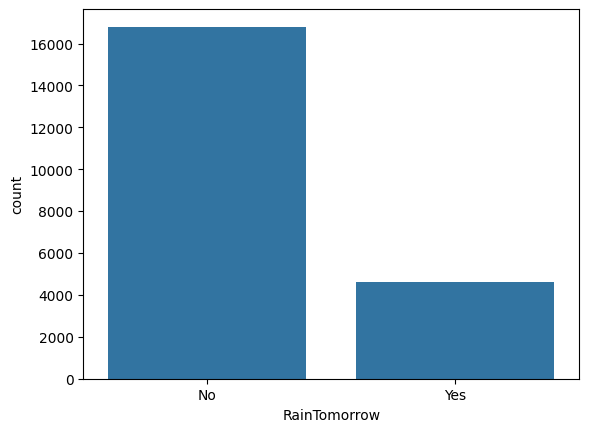

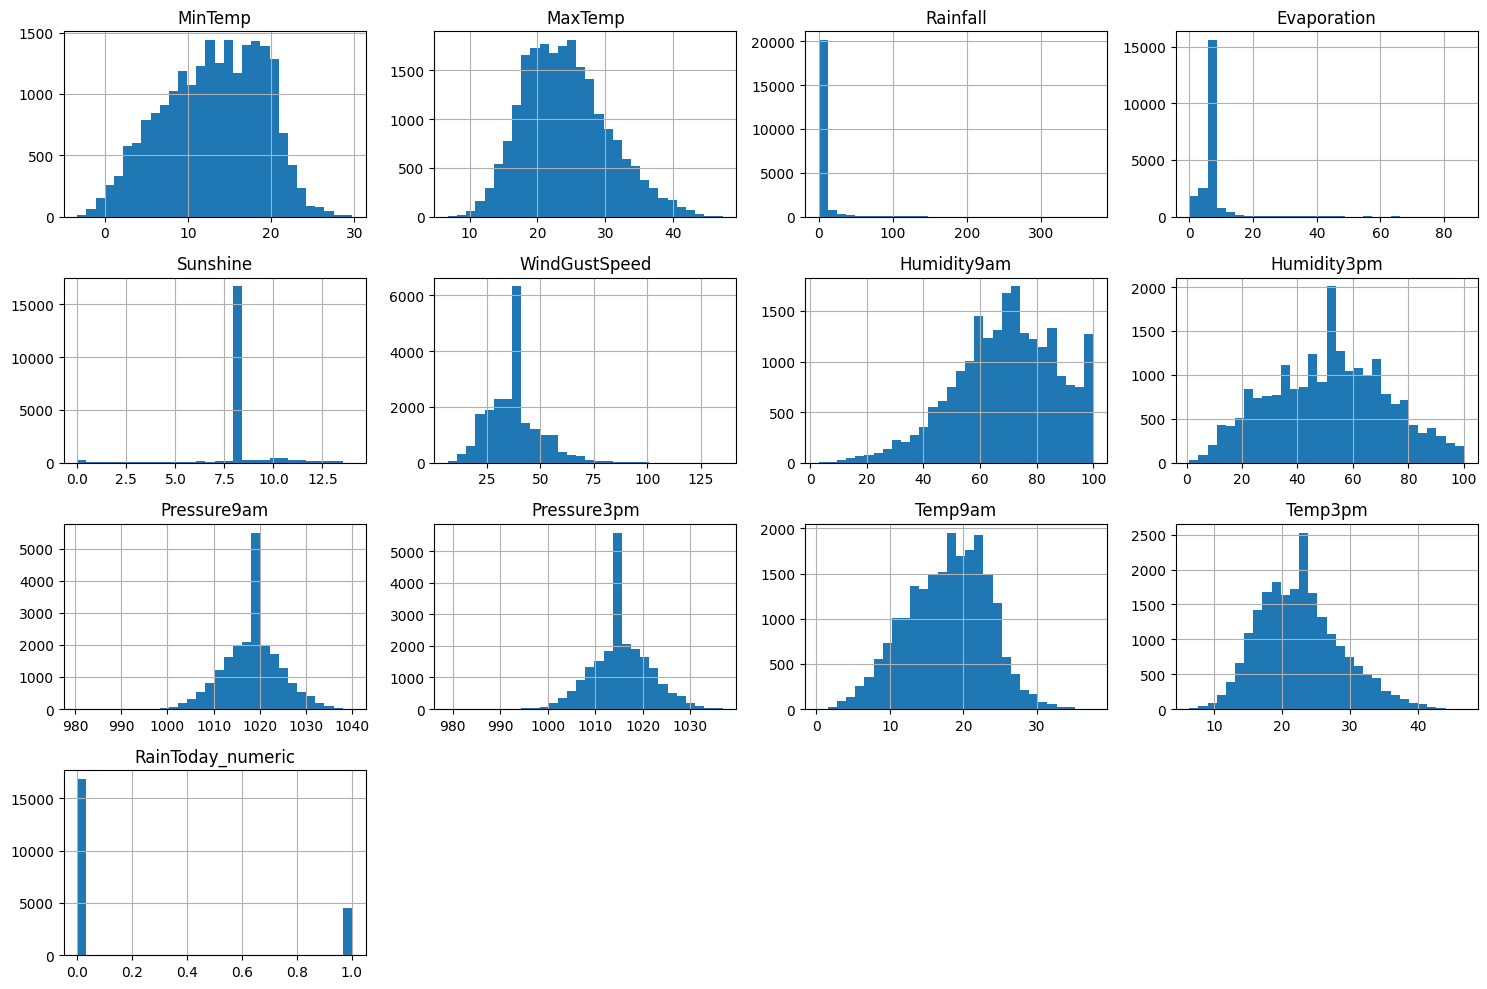

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x='RainTomorrow', data=df)
plt.show()

# Plot the distribution of numeric features
df[features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

(4280,)
Accuracy: 0.8329439252336449
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3328
           1       0.68      0.47      0.55       952

    accuracy                           0.83      4280
   macro avg       0.77      0.70      0.73      4280
weighted avg       0.82      0.83      0.82      4280



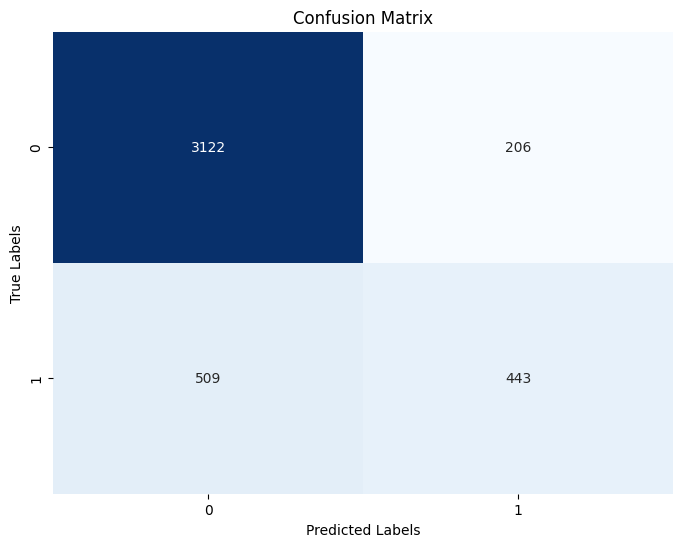

    MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.666667  0.745679  0.000000     0.071095  0.579969       0.239161   
1  0.675758  0.400000  0.000000     0.071095  0.579969       0.320312   
2  0.339394  0.424691  0.000000     0.071095  0.579969       0.062500   
3  0.375758  0.197531  0.000000     0.071095  0.579969       0.523438   
4  0.390909  0.298765  0.010243     0.071095  0.579969       0.148438   
5  0.230303  0.345679  0.000000     0.071095  0.579969       0.179688   
6  0.715152  0.641975  0.000000     0.132251  0.579969       0.203125   
7  0.412121  0.370370  0.004313     0.071095  0.579969       0.289062   
8  0.487879  0.498765  0.000000     0.071095  0.579969       0.304688   
9  0.439394  0.301235  0.008086     0.071095  0.579969       0.239161   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0     0.432990     0.508336     0.635386     0.633262  0.756684  0.404371   
1     0.773196     0.787879     0.601010  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model (assuming y_test and y_pred are defined)
accuracy = accuracy_score(y_test, y_pred)

print( y_test.shape)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))




# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Get unique class labels
class_labels = sorted(y.unique())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Show some test sample predictions (assuming model and results DataFrame are defined)
test_samples = X_test_scaled_df.head(10)
predictions = model.predict(test_samples)
actuals = y_test.head(10)

# Create a DataFrame to display the results
results = test_samples.copy()
results['Actual'] = actuals.values
results['Predicted'] = predictions
results['Predicted'] = results['Predicted'].apply(lambda x: class_labels[x])
results['Actual'] = results['Actual'].apply(lambda x: class_labels[x])

print(results)


                    MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp            1.000000  0.701957  0.100171     0.258036 -0.041630   
MaxTemp            0.701957  1.000000 -0.092341     0.355125  0.182107   
Rainfall           0.100171 -0.092341  1.000000    -0.023806 -0.151667   
Evaporation        0.258036  0.355125 -0.023806     1.000000  0.196251   
Sunshine          -0.041630  0.182107 -0.151667     0.196251  1.000000   
WindGustSpeed      0.348756  0.207083  0.134609     0.126702 -0.031266   
WindSpeed9am       0.268636  0.093375  0.113854     0.117393 -0.010690   
WindSpeed3pm       0.212296  0.052651  0.067038    -0.007589 -0.019923   
Humidity9am       -0.124190 -0.430388  0.237185    -0.260338 -0.247804   
Humidity3pm        0.119975 -0.443940  0.248062    -0.233181 -0.321650   
Pressure9am       -0.444813 -0.370282 -0.095480    -0.155931  0.008197   
Pressure3pm       -0.420203 -0.431851 -0.059866    -0.170777 -0.016515   
Cloud9am           0.109766 -0.194469 

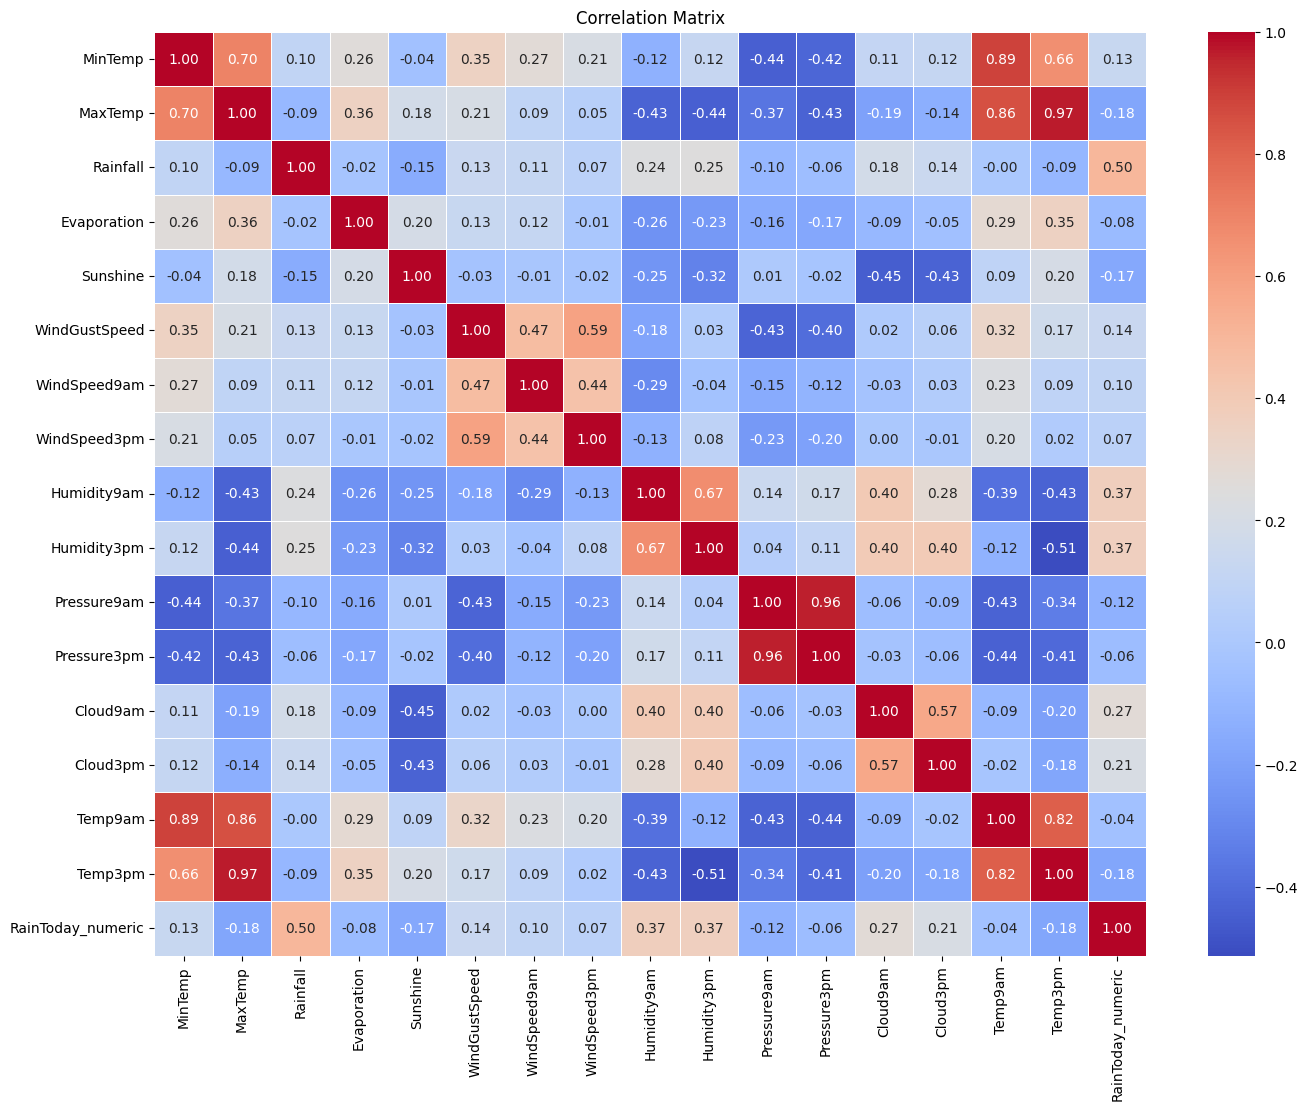

In [28]:
# Selecting only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Print correlation matrix
print(correlation_matrix)
# Plotting the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Epoch 1/50
428/428 [==============================] - 13s 17ms/step - loss: 0.7963 - accuracy: 0.7825 - val_loss: 0.4522 - val_accuracy: 0.8230
Epoch 2/50
428/428 [==============================] - 5s 13ms/step - loss: 0.5873 - accuracy: 0.7983 - val_loss: 0.4691 - val_accuracy: 0.8055
Epoch 3/50
428/428 [==============================] - 7s 17ms/step - loss: 0.6360 - accuracy: 0.7650 - val_loss: 0.4673 - val_accuracy: 0.8029
Epoch 4/50
428/428 [==============================] - 3s 6ms/step - loss: 0.6015 - accuracy: 0.7427 - val_loss: 0.9003 - val_accuracy: 0.6013
Epoch 5/50
428/428 [==============================] - 3s 6ms/step - loss: 0.5443 - accuracy: 0.7813 - val_loss: 0.4159 - val_accuracy: 0.8268
Epoch 6/50
428/428 [==============================] - 3s 6ms/step - loss: 0.4785 - accuracy: 0.8047 - val_loss: 0.4235 - val_accuracy: 0.7988
Epoch 7/50
428/428 [==============================] - 4s 9ms/step - loss: 0.5070 - accuracy: 0.7811 - val_loss: 1.6444 - val_accuracy: 0.7798
Ep

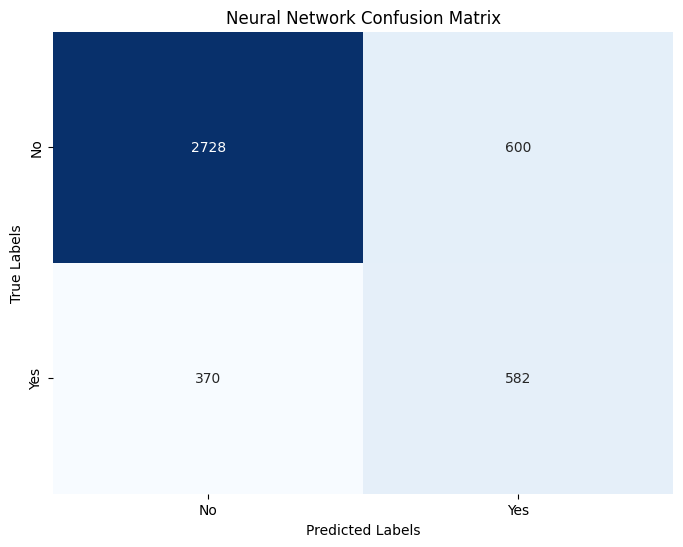

1/1 [==============================] - 0s 32ms/step
    MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.666667  0.745679  0.000000     0.071095  0.579969       0.239161   
1  0.675758  0.400000  0.000000     0.071095  0.579969       0.320312   
2  0.339394  0.424691  0.000000     0.071095  0.579969       0.062500   
3  0.375758  0.197531  0.000000     0.071095  0.579969       0.523438   
4  0.390909  0.298765  0.010243     0.071095  0.579969       0.148438   
5  0.230303  0.345679  0.000000     0.071095  0.579969       0.179688   
6  0.715152  0.641975  0.000000     0.132251  0.579969       0.203125   
7  0.412121  0.370370  0.004313     0.071095  0.579969       0.289062   
8  0.487879  0.498765  0.000000     0.071095  0.579969       0.304688   
9  0.439394  0.301235  0.008086     0.071095  0.579969       0.239161   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0     0.432990     0.508336     0.635386     0.633262  0.756684  0.

In [29]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
# Load the dataset
#df = pd.read_csv('weatherAUS.csv')
df = pd.read_csv('drive/MyDrive/Colab Notebooks/weatherAUS.csv')

# Preprocess the data
df = df.dropna(subset=['RainTomorrow'])
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

le = LabelEncoder()
df['RainToday_numeric'] = le.fit_transform(df['RainToday'])

features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
            'RainToday_numeric']
target = 'RainTomorrow'

X = df[features]
y = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

#model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
#model.add(Dense(25, activation='relu'))
#model.add(Dense(5, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

model.add(Dense(432, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Dense(225))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Dense(25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Dense(1, activation='tanh'))  # Normalized Tanh


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {nn_accuracy}')
print(classification_report(y_test, y_pred_nn))

# Calculate confusion matrix for Neural Network
nn_conf_mat = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix for Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(nn_conf_mat, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Show some test sample predictions for Neural Network
test_samples = pd.DataFrame(X_test_scaled[:10], columns=features)
predictions = (model.predict(X_test_scaled[:10]) > 0.5).astype("int32")
actuals = y_test[:10].values

# Create a DataFrame to display the results for Neural Network
results = test_samples.copy()
results['Actual'] = actuals
results['Predicted'] = predictions
results['Predicted'] = results['Predicted'].apply(lambda x: 'Yes' if x == 1 else 'No')
results['Actual'] = results['Actual'].apply(lambda x: 'Yes' if x == 1 else 'No')

print(results)
